# Data Analysis
This is the main notebook performing all feature engineering, model selection, training, evaluation etc.  
The different steps are:
 - Step1 - import dependencies
 - Step2 - load payloads into memory
 - Step3A - Feature engineering custom features
 - Step3B - Feature engineering bag-of-words
 - Step3C - Feature space visualization
 - Step4 - Model selection
 - (Step4B - Load pre-trained classifiers)
 - Step5 - Visualization
 - Step6 - Website integration extract

# Step1
import dependencies

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn
import string
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier


import sklearn.gaussian_process.kernels as kernels

from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import expon

# Step2
load the payloads into memory

In [6]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(30))

,payload,is_malicious,injection_type
index,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS
1,mc_6081_149,0.0,LEGAL
2,shines,0.0,LEGAL
3,revulsion,0.0,LEGAL
4,3857146085955889,0.0,LEGAL
5,34846,0.0,LEGAL
6,06173,0.0,LEGAL
7,09199,0.0,LEGAL
8,C%2F+Pu%F1onrostro+S%2FN%2C+,0.0,LEGAL


# Step3A - feature engineering custom features  
We will create our own feature space with features that might be important for this task, this includes:
 - length of payload
 - number of non-printable characters in payload
 - number of punctuation characters in payload
 - the minimum byte value of payload
 - the maximum byte value of payload
 - the mean byte value of payload
 - the standard deviation of payload byte values
 - number of distinct bytes in payload
 - number of SQL keywords in payload
 - number of javascript keywords in payload

In [7]:
def plot_feature_distribution(features):
    print('Properties of feature: ' + features.name)
    print(features.describe())
    f, ax = plt.subplots(1, figsize=(10, 6))
    ax.hist(features, bins=features.max()-features.min()+1, normed=1)
    ax.set_xlabel('value')
    ax.set_ylabel('fraction')
    
    plt.show()

,payload,is_malicious,injection_type,length
index,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60
1,mc_6081_149,0.0,LEGAL,11
2,shines,0.0,LEGAL,6
3,revulsion,0.0,LEGAL,9
4,3857146085955889,0.0,LEGAL,16


Properties of feature: length
count    110357.000000
mean         16.559638
std          32.108637
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max         974.000000
Name: length, dtype: float64


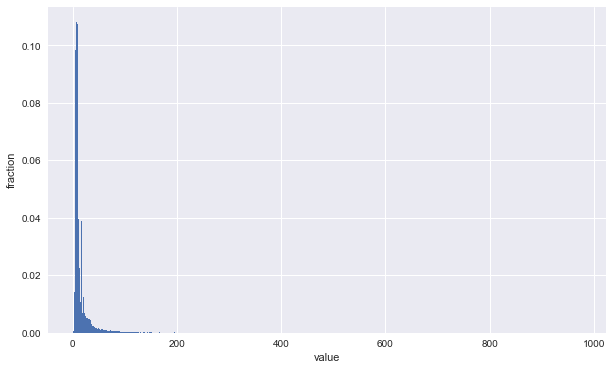

In [8]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)
display(payloads.head())


plot_feature_distribution(payloads['length'])


,payload,is_malicious,injection_type,length,non-printable
index,,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60,0
1,mc_6081_149,0.0,LEGAL,11,0
2,shines,0.0,LEGAL,6,0
3,revulsion,0.0,LEGAL,9,0
4,3857146085955889,0.0,LEGAL,16,0


Properties of feature: non-printable
count    110357.000000
mean          0.007412
std           0.216736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: non-printable, dtype: float64


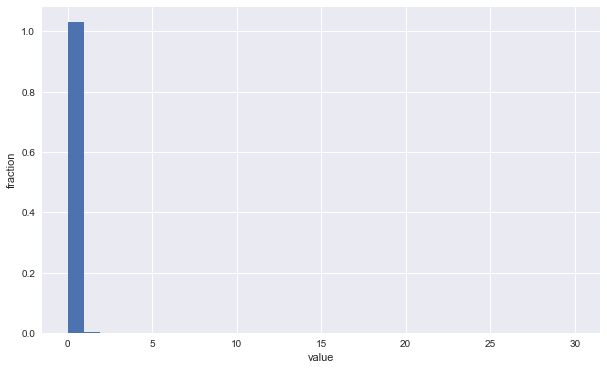

In [10]:
def create_feature_non_printable_characters(payloads):  
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['non-printable'] = [ len([1 for letter in str(row) if letter not in string.printable]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['non-printable'])


,payload,is_malicious,injection_type,length,non-printable,punctuation
index,,,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60,0,16
1,mc_6081_149,0.0,LEGAL,11,0,2
2,shines,0.0,LEGAL,6,0,0
3,revulsion,0.0,LEGAL,9,0,0
4,3857146085955889,0.0,LEGAL,16,0,0


Properties of feature: punctuation
count    110357.000000
mean          2.363729
std           9.771260
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         538.000000
Name: punctuation, dtype: float64


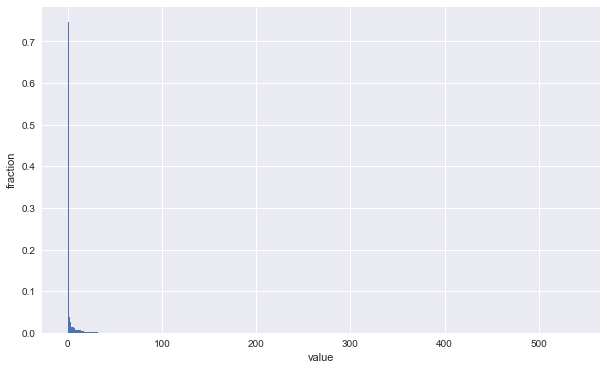

In [11]:
def create_feature_punctuation_characters(payloads):
    '''
    Feature
    Number of punctuation characthers within payload
    '''
    
    payloads['punctuation'] = [ len([1 for letter in str(row) if letter in string.punctuation]) for row in payloads['payload']]
    return payloads
    

create_feature_punctuation_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['punctuation'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte
index,,,,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60,0,16,32
1,mc_6081_149,0.0,LEGAL,11,0,2,48
2,shines,0.0,LEGAL,6,0,0,101
3,revulsion,0.0,LEGAL,9,0,0,101
4,3857146085955889,0.0,LEGAL,16,0,0,48


Properties of feature: min-byte
count    110357.000000
mean         71.225849
std          26.545900
min           9.000000
25%          48.000000
50%          75.000000
75%          97.000000
max         125.000000
Name: min-byte, dtype: float64


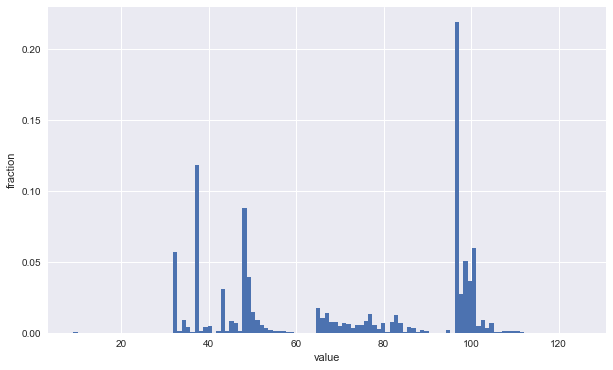

In [12]:
def create_feature_min_byte_value(payloads):
    '''
    Feature
    Minimum byte value in payload
    '''
    
    payloads['min-byte'] = [ min(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_min_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['min-byte'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte
index,,,,,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60,0,16,32,118
1,mc_6081_149,0.0,LEGAL,11,0,2,48,109
2,shines,0.0,LEGAL,6,0,0,101,115
3,revulsion,0.0,LEGAL,9,0,0,101,118
4,3857146085955889,0.0,LEGAL,16,0,0,48,57


Properties of feature: max-byte
count    110357.000000
mean        109.495229
std          20.327697
min          33.000000
25%         114.000000
50%         116.000000
75%         118.000000
max         240.000000
Name: max-byte, dtype: float64


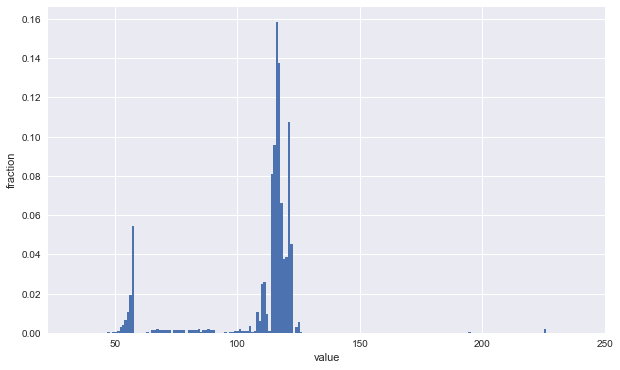

In [13]:
def create_feature_max_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['max-byte'] = [ max(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_max_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['max-byte'])

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte
index,,,,,,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60,0,16,32,118,87.016667
1,mc_6081_149,0.0,LEGAL,11,0,2,48,109,69.363636
2,shines,0.0,LEGAL,6,0,0,101,115,108.333333
3,revulsion,0.0,LEGAL,9,0,0,101,118,111.000000
4,3857146085955889,0.0,LEGAL,16,0,0,48,57,53.687500


Properties of feature: mean-byte
count    110357.000000
mean         92.514086
std          19.323081
min          33.000000
25%          83.000000
50%         101.000000
75%         107.000000
max         164.000000
Name: mean-byte, dtype: float64


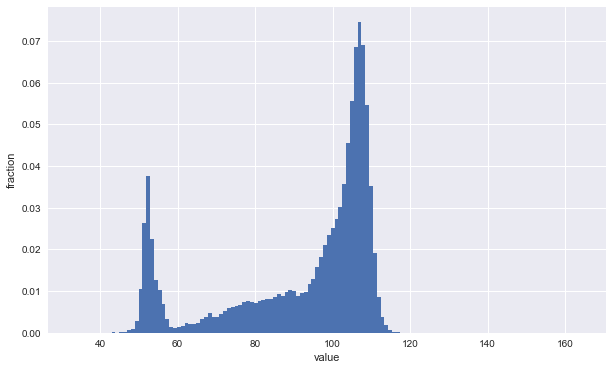

In [14]:
def create_feature_mean_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['mean-byte'] = [ np.mean(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_mean_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['mean-byte'].astype(int))

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte
index,,,,,,,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60,0,16,32,118,87.016667,28.774695
1,mc_6081_149,0.0,LEGAL,11,0,2,48,109,69.363636,23.195896
2,shines,0.0,LEGAL,6,0,0,101,115,108.333333,5.405758
3,revulsion,0.0,LEGAL,9,0,0,101,118,111.000000,5.333333
4,3857146085955889,0.0,LEGAL,16,0,0,48,57,53.687500,2.639099


Properties of feature: std-byte
count    110357.000000
mean         12.155649
std           9.201210
min           0.000000
25%           5.000000
50%           7.000000
75%          20.000000
max          75.000000
Name: std-byte, dtype: float64


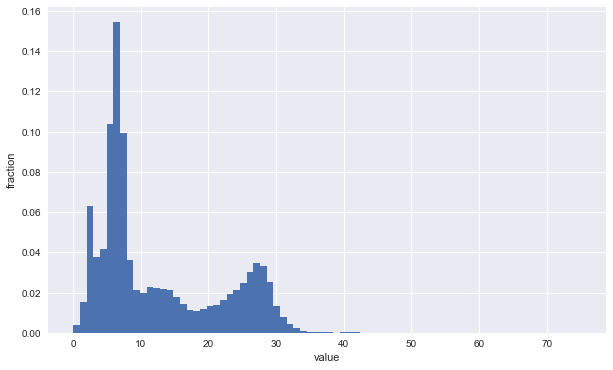

In [15]:
def create_feature_std_byte_value(payloads):
    '''
    Feature
    Standard deviation byte value in payload
    '''
    
    payloads['std-byte'] = [ np.std(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_std_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['std-byte'].astype(int))

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-bytes
index,,,,,,,,,,,
0,"<object classid=""clsid:..."" codebase=""javascri...",1.0,XSS,60,0,16,32,118,87.016667,28.774695,25
1,mc_6081_149,0.0,LEGAL,11,0,2,48,109,69.363636,23.195896,9
2,shines,0.0,LEGAL,6,0,0,101,115,108.333333,5.405758,5
3,revulsion,0.0,LEGAL,9,0,0,101,118,111.000000,5.333333,9
4,3857146085955889,0.0,LEGAL,16,0,0,48,57,53.687500,2.639099,9


Properties of feature: distinct-bytes
count    110357.000000
mean          9.483087
std           7.410797
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          76.000000
Name: distinct-bytes, dtype: float64


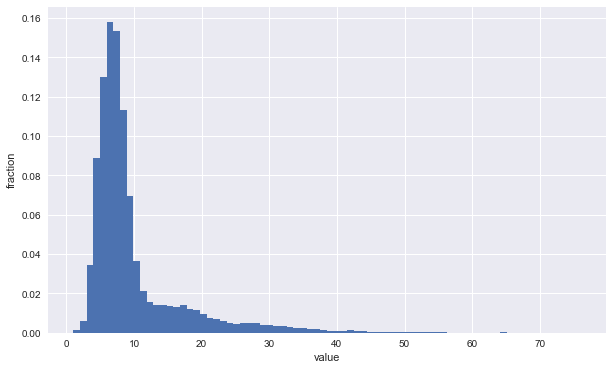

In [ ]:
def create_feature_distinct_bytes(payloads):
    '''
    Feature
    Number of distinct bytes in payload
    '''
    
    payloads['distinct-bytes'] = [ len(list(set(bytearray(str(row), 'utf8')))) for row in payloads['payload']]
    return payloads

create_feature_distinct_bytes(payloads)
display(payloads.head())

plot_feature_distribution(payloads['distinct-bytes'])

In [ ]:
sql_keywords = pd.read_csv('data/SQLKeywords.txt', index_col=False)

def create_feature_sql_keywords(payloads):
    
    '''
    Feature
    Number of SQL keywords within payload
    '''
    payloads['sql-keywords'] = [ len([1 for keyword in sql_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads

create_feature_sql_keywords(payloads)
display(type(sql_keywords))
display(payloads.head())
plot_feature_distribution(payloads['sql-keywords'])
    

In [ ]:
js_keywords = pd.read_csv('data/JavascriptKeywords.txt', index_col=False)

def create_feature_javascript_keywords(payloads):
    '''
    Feature
    Number of Javascript keywords within payload
    '''
    
    payloads['js-keywords'] = [len([1 for keyword in js_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
    

create_feature_javascript_keywords(payloads)
display(payloads.head())    
plot_feature_distribution(payloads['js-keywords'])
    
    

define a function that makes a feature vector from the payload using the custom features

In [ ]:
def create_features(payloads):
    features = create_feature_length(payloads)
    features = create_feature_non_printable_characters(features)
    features = create_feature_punctuation_characters(features)
    features = create_feature_max_byte_value(features)
    features = create_feature_min_byte_value(features)
    features = create_feature_mean_byte_value(features)
    features = create_feature_std_byte_value(features)
    features = create_feature_distinct_bytes(features)
    features = create_feature_sql_keywords(features)
    features = create_feature_javascript_keywords(features)
    del features['payload']

    return features

### Scoring custom features
Score the custom features using the SelectKBest function, then visualize the scores in a graph  
to see which features are less significant

[ 1741947.55319445     8315.00812852  1327640.01843927    11961.95267096
   209306.71262799    16750.06417719   202116.21011929   289328.55486197
    33370.32829912    51571.75031561]
[ 1741947.55     8315.01  1327640.02    11961.95   209306.71    16750.06
   202116.21   289328.55    33370.33    51571.75]


['non-printable',
 'max-byte',
 'mean-byte',
 'sql-keywords',
 'js-keywords',
 'std-byte',
 'min-byte',
 'distinct-bytes',
 'punctuation',
 'length']

['max-byte 8315.00812852',
 'sql-keywords 11961.952671',
 'std-byte 16750.0641772',
 'punctuation 33370.3282991',
 'length 51571.7503156',
 'min-byte 202116.210119',
 'js-keywords 209306.712628',
 'distinct-bytes 289328.554862',
 'mean-byte 1327640.01844',
 'non-printable 1741947.55319']

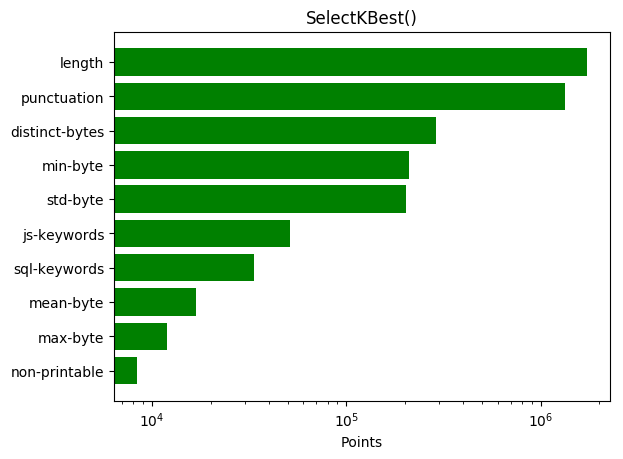

In [15]:
Y = payloads['is_malicious']
X = create_features(pd.DataFrame(payloads['payload'].copy()))


test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, Y)
# summarize scores
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
# summarize scores
np.set_printoptions(precision=2)
print(fit.scores_)

# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)

# To get your top 10 feature names
featuress = []
for i in range(10):
    featuress.append(X.columns[indices[i]])

display(featuress)
display([featuress[i] + ' ' + str(fit.scores_[i]) for i in indices[range(10)]])


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(featuress))
performance = 3 + 10 * np.random.rand(len(featuress))
error = np.random.rand(len(featuress))

ax.barh(y_pos, fit.scores_[indices[range(10)]],  align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(featuress)
ax.set_xscale('log')

#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Points')
ax.set_title('SelectKBest()')

plt.show()







# Step3B - Feature engineering using bag of words techniques.
Additional to our custom feature space, we will create 6 more feature spaces using bag-of-words techniques  
The following vectorizers below is another way of creating features for text input.  
We will test the performance of these techniques independently from our custom features in Step 3A.  
We will create vectorizers of these combinations:
- 1-grams CountVectorizer
- 2-grams CountVectorizer
- 3-grams CountVectorizer
- 1-grams TfidfVectorizer
- 2-grams TfidfVectorizer
- 3-grams TfidfVectorizer

The type of N-gram function determines how the actual "words" should be created from the payload string  
Each vectorizer is used later in Step4 in Pipeline objects before training  
See report for further explanation

### 1-Grams features
create a Countvectorizer and TF-IDFvectorizer that uses 1-grams.  
1-grams equals one feature for each letter/symbol recorded

In [4]:
def get1Grams(payload_obj):
    '''Divides a string into 1-grams
    
    Example: input - payload: "<script>"
             output- ["<","s","c","r","i","p","t",">"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-1):
        ngrams.append(payload[i:i+1])
    return ngrams

tfidf_vectorizer_1grams = TfidfVectorizer(tokenizer=get1Grams)
count_vectorizer_1grams = CountVectorizer(min_df=1, tokenizer=get1Grams)

### 2-Grams features
create a Countvectorizer and TF-IDFvectorizer that uses 2-grams.  

In [5]:
def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

tfidf_vectorizer_2grams = TfidfVectorizer(tokenizer=get2Grams)
count_vectorizer_2grams = CountVectorizer(min_df=1, tokenizer=get2Grams)

### 3-Grams features
Create a Countvectorizer and TF-IDFvectorizer that uses 3-grams

In [6]:
def get3Grams(payload_obj):
    '''Divides a string into 3-grams
    
    Example: input - payload: "<script>"
             output- ["<sc","scr","cri","rip","ipt","pt>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-3):
        ngrams.append(payload[i:i+3])
    return ngrams

tfidf_vectorizer_3grams = TfidfVectorizer(tokenizer=get3Grams)
count_vectorizer_3grams = CountVectorizer(min_df=1, tokenizer=get3Grams)

## Step3C - Feature space visualization
After creating our different feature spaces to later train each classifier on,  
we first examine them visually by projecting the feature spaces into two dimensions using Principle Component Analysis  
Graphs are shown below displaying the data in 3 out of 7 of our feature spaces

In [9]:
def visualize_feature_space_by_projection(X,Y,title='PCA'):
    '''Plot a two-dimensional projection of the dataset in the specified feature space
    
    input: X - data
           Y - labels
           title - title of plot
    '''
    pca = TruncatedSVD(n_components=2)
    X_r = pca.fit(X).transform(X)

    # Percentage of variance explained for each components
    print('explained variance ratio (first two components): %s'
          % str(pca.explained_variance_ratio_))

    plt.figure()
    colors = ['blue', 'darkorange']
    lw = 2

    #Plot malicious and non-malicious separately with different colors
    for color, i, y in zip(colors, [0, 1], Y):
        plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.3, lw=lw,
                    label=i)
        
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()

### 1-Grams CountVectorizer feature space visualization

explained variance ratio (first two components): [ 0.26506858  0.22575119]


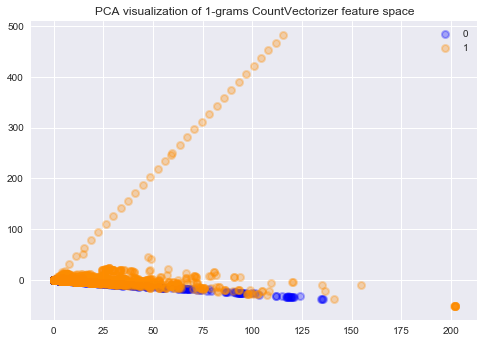

In [10]:
X = count_vectorizer_1grams.fit_transform(payloads['payload'])
Y = payloads['is_malicious']
visualize_feature_space_by_projection(X,Y,title='PCA visualization of 1-grams CountVectorizer feature space')

### 3-Grams TFIDFVectorizer feature space visualization

explained variance ratio (first two components): [ 0.00579326  0.00259541]


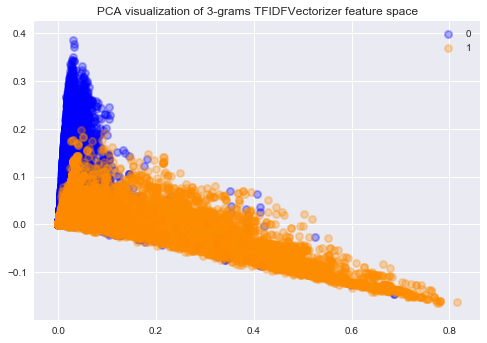

In [11]:
X = tfidf_vectorizer_3grams.fit_transform(payloads['payload'])
Y = payloads['is_malicious']
visualize_feature_space_by_projection(X,Y,title='PCA visualization of 3-grams TFIDFVectorizer feature space')

### Custom feature space visualization

explained variance ratio (first two components): [ 0.3412141   0.49034105]


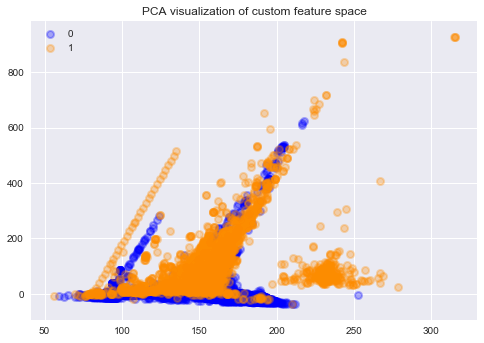

In [34]:
X = create_features(pd.DataFrame(payloads['payload'].copy()))
Y = payloads['is_malicious']
visualize_feature_space_by_projection(X,Y,title='PCA visualization of custom feature space')

#  Step4 - Model selection and evaluation

First, we will automate hyperparameter tuning and out of sample testing using train_model below

In [6]:
def train_model(clf, param_grid, X, Y):
    '''Trains and evaluates the model clf from input
    
    The function selects the best model of clf by optimizing for the validation data,
    then evaluates its performance using the out of sample test data.
    
    input - clf: the model to train
            param_grid: a dict of hyperparameters to use for optimization
            X: features
            Y: labels
    
    output - the best estimator (trained model)
             the confusion matrix from classifying the test data
    '''
    
    #First, partition into train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    n_iter = 5
    #If number of possible iterations are less than prefered number of iterations, 
    #set it to the number of possible iterations
    #number of possible iterations are not less than prefered number of iterations if any argument is expon()
    #because expon() is continous (writing 100 instead, could be any large number)
    n_iter = min(n_iter,np.prod([
        100 if type(xs) == type(expon()) 
        else len(xs) 
        for xs in param_grid.values()
    ]))
    
    #perform a grid search for the best parameters on the training data.
    #Cross validation is made to select the parameters, so the training data is actually split into
    #a new train data set and a validation data set, K number of times
    cv = ShuffleSplit(n=len(X_train), n_iter=5, test_size=0.2, random_state=0) #DEBUG: n_iter=10
    #cv = KFold(n=len(X), n_folds=10)
    random_grid_search = RandomizedSearchCV(
        clf, 
        param_distributions=param_grid,
        cv=cv, 
        scoring='f1', 
        n_iter=n_iter, #DEBUG 1 
        random_state=5,
        refit=True,
        verbose=10
    )
    
    '''Randomized search used instead. We have limited computing power
    grid_search = GridSearchCV(
        clf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1', #accuracy/f1/f1_weighted all give same result?
        verbose=10,
        n_jobs=-1
    )
    grid_search.fit(X_train, Y_train)
    '''
    random_grid_search.fit(X_train, Y_train)
    
    #Evaluate the best model on the test data
    Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)
    Y_test_predicted_prob = random_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    confusion = confusion_matrix(Y_test, Y_test_predicted)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    #Calculate recall (sensitivity) from confusion matrix
    sensitivity = TP / float(TP + FN)
    
    #Calculate specificity from confusion matrix
    specificity = TN / float(TN + FP)

    #Calculate accuracy
    accuracy = (confusion[0][0] + confusion[1][1]) / (confusion.sum().sum())
    
    #Calculate axes of ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_predicted_prob)
    
    #Area under the ROC curve
    auc = roc_auc_score(Y_test, Y_test_predicted_prob)

    return {
        'conf_matrix':confusion, 
        'accuracy':accuracy, 
        'sensitivity':sensitivity,
        'specificity':specificity,
        'auc':auc,
        'params':random_grid_search.best_params_,
        'model':random_grid_search.best_estimator_,
        'roc':{'fpr':fpr,'tpr':tpr,'thresholds':thresholds}
    }


Then, we will use the train_model function to train, optimize and retrieve out of sample testing results from a range of classifiers.  
Classifiers tested using our custom feature space:
 - AdaBoost
 - SGD classifier 
 - MultiLayerPerceptron classifier
 - Logistic Regression
 - Support Vector Machine
 - Random forest
 - Decision Tree
 - Multinomial Naive Bayes

Classifiers tested using bag-of-words feature spaces:
 - MultiLayerPerceptron classifier
 - Logistic Regression
 - Support Vector Machine
 - Random forest
 - Multinomial Naive Bayes
 
 Some classifiers were unable to train using a bag-of-words feature space because they couldn't handle sparse graphs
 
 All their best parameters with their performance is stored in a dataframe called classifier_results

Make dictionary of models with parameters to optimize using bag-of-words feature spaces

In [34]:
def create_classifier_inputs_using_vectorizers(vectorizer, subscript):
    '''make pipelines of the specified vectorizer with the classifiers to train
    
    input - vectorizer: the vectorizer to add to the pipelines
            subscript:  subscript name for the dictionary key
            
    output - A dict of inputs to use for train_model(); a pipeline and a dict of params to optimize
    '''
    
    classifier_inputs = {}
    
    classifier_inputs[subscript + ' MLPClassifier'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=False,
            verbose=True
            
        ))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__hidden_layer_sizes':[(500,250,125,62)],
            'clf__alpha':[0.0005,0.001,0.01,0.1,1],
            'clf__learning_rate':['constant','invscaling'],
            'clf__learning_rate_init':[0.001,0.01,0.1,1],
            'clf__momentum':[0,0.9],
        }
    }
    '''
    classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',MultinomialNB())]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40]
        }
    }
    classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__n_estimators':[10,20,40,60]
        }
    }
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',LogisticRegression())]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
    classifier_inputs[subscript + ' SVM'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',SVC(probability=True))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'clf__gamma':[0.001, 0.0001,'auto'],
            'clf__kernel':['rbf']
        }
    }
    '''
    
    return classifier_inputs


Make dictionary of models with parameters to optimize using custom feature spaces

In [49]:
def create_classifier_inputs(subscript):
    
    classifier_inputs = {}
    
    
    '''classifier_inputs[subscript + ' GPC'] = {
        'pipeline':GaussianProcessClassifier(),
        'dict_params': {
            'kernel':[
                1.0*kernels.RBF(1.0),
                1.0*kernels.Matern(),
                1.0*kernels.RationalQuadratic(),
                1.0*kernels.DotProduct()
            ]
        }
    }'''
    classifier_inputs[subscript + ' AdaBoostClassifier'] = {
        'pipeline':AdaBoostClassifier(n_estimators=100),
        'dict_params': {
            'n_estimators':[10,20,50, 100], 
            'learning_rate':[0.1, 0.5, 1.0, 2.0]
        }
    }
    classifier_inputs[subscript + ' SGD'] = {
        'pipeline':SGDClassifier(loss="log", penalty="l2"),
        'dict_params': {
            'learning_rate': ['optimal']
        }
    }
    classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0),
        'dict_params': {
            'n_estimators':[10,20,40,60]
        }
    }
    classifier_inputs[subscript + ' DecisionTree'] = {
        'pipeline':  DecisionTreeClassifier(max_depth=5),
        'dict_params': {
            'min_samples_split': [2]
        }
    }
    '''classifier_inputs[subscript + ' MLPClassifier'] = {
        'pipeline':MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=False,
            verbose=True
            
        ),
        'dict_params': {
            'hidden_layer_sizes':[(300, 200, 150, 150), (30, 30, 30), (150, 30, 30, 150), 
                                  (400, 250, 100, 100) , (150, 200, 300)],
            'alpha':[0.0005,0.001,0.01,0.1,1],
            'learning_rate':['constant','invscaling'],
            'learning_rate_init':[0.0005,0.001,0.01,0.1,1],
            'momentum':[0,0.9],
        }
    }'''
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':LogisticRegression(),
        'dict_params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
    classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':MultinomialNB(),
        'dict_params': {
            'alpha': [1.0]
        }
    }
    
    '''classifier_inputs[subscript + ' SVM'] = {
        'pipeline':SVC(probability=True),
        'dict_params': {
            'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'gamma':[0.001, 0.0001,'auto'],
            'kernel':['rbf']
        }
    }'''
    return classifier_inputs
    

Create a new result table

In [35]:
classifier_results = pd.DataFrame(columns=['accuracy','sensitivity','specificity','auc','conf_matrix','params','model','roc'])#,index=classifier_inputs.keys())

Use the 6 different feature spaces generated from the vectorizers previously above, 
and train every classifier in classifier_inputs in every feature space

### P.S! Don't try to run this, it will take several days to complete  
### Instead skip to Step4B

In [ ]:
classifier_inputs = {}
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_1grams,'count 1grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_2grams,'count 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_3grams,'count 3grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_1grams,'tfidf 1grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_2grams,'tfidf 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_3grams,'tfidf 3grams'))


X = payloads['payload'] 
Y = payloads['is_malicious']

for classifier_name, inputs in classifier_inputs.items():
    display(inputs['dict_params'])
    if classifier_name in classifier_results.index.values.tolist():
        print('Skipping ' + classifier_name + ', already trained')
    else:
        result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
        classifier_results.loc[classifier_name] = result_dict

display(classifier_results)

{'clf__alpha': [0.0005, 0.001, 0.01, 0.1, 1],
 'clf__hidden_layer_sizes': [(500, 250, 125, 62)],
 'clf__learning_rate': ['constant', 'invscaling'],
 'clf__learning_rate_init': [0.001, 0.01, 0.1, 1],
 'clf__momentum': [0, 0.9],
 'vect__min_df': [1, 2, 5, 10, 20, 40]}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10 
Iteration 1, loss = 0.16121015
Iteration 2, loss = 0.09513512
Iteration 3, loss = 0.05008793
Iteration 4, loss = 0.04394987
Iteration 5, loss = 0.03742232
Iteration 6, loss = 0.03798333
Iteration 7, loss = 0.03913258
Iteration 8, loss = 0.03425985
Iteration 9, loss = 0.03764660
Iteration 10, loss = 0.03237561
Iteration 11, loss = 0.03873883
Iteration 12, loss = 0.03557829
Iteration 13, loss = 0.03636709
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10, score=0.974001, total=12.2min
[CV] clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_r

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.2min remaining:    0.0s


Iteration 1, loss = 0.16279731
Iteration 2, loss = 0.07925525
Iteration 3, loss = 0.05666222
Iteration 4, loss = 0.04632985
Iteration 5, loss = 0.04749161
Iteration 6, loss = 0.04424528
Iteration 7, loss = 0.03697507
Iteration 8, loss = 0.04111203
Iteration 9, loss = 0.03924612
Iteration 10, loss = 0.03894181
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10, score=0.978144, total= 9.3min
[CV] clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 21.6min remaining:    0.0s


Iteration 1, loss = 0.17005902
Iteration 2, loss = 0.09020427
Iteration 3, loss = 0.05339319
Iteration 4, loss = 0.04799238
Iteration 5, loss = 0.04230805
Iteration 6, loss = 0.04008378
Iteration 7, loss = 0.04186587
Iteration 8, loss = 0.03630419
Iteration 9, loss = 0.03738015
Iteration 10, loss = 0.03807127
Iteration 11, loss = 0.03868825
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10, score=0.967555, total=10.3min
[CV] clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 31.9min remaining:    0.0s


Iteration 1, loss = 0.21308621
Iteration 2, loss = 0.07326554
Iteration 3, loss = 0.06426750
Iteration 4, loss = 0.04160747
Iteration 5, loss = 0.04142850
Iteration 6, loss = 0.04136818
Iteration 7, loss = 0.03636555
Iteration 8, loss = 0.03771068
Iteration 9, loss = 0.03211951
Iteration 10, loss = 0.04014684
Iteration 11, loss = 0.03579480
Iteration 12, loss = 0.03310445
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10, score=0.972258, total=11.3min
[CV] clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 43.3min remaining:    0.0s


Iteration 1, loss = 0.16647477
Iteration 2, loss = 0.08404627
Iteration 3, loss = 0.04935585
Iteration 4, loss = 0.04057565
Iteration 5, loss = 0.03740521
Iteration 6, loss = 0.04020131
Iteration 7, loss = 0.03593586
Iteration 8, loss = 0.03650297
Iteration 9, loss = 0.03560970
Iteration 10, loss = 0.04026369
Iteration 11, loss = 0.03743374
Iteration 12, loss = 0.03226538
Iteration 13, loss = 0.03488808
Iteration 14, loss = 0.03655954
Iteration 15, loss = 0.03171322
Iteration 16, loss = 0.03626348
Iteration 17, loss = 0.03057116
Iteration 18, loss = 0.03529684
Iteration 19, loss = 0.03558647
Iteration 20, loss = 0.03307547
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_rate=invscaling, clf__alpha=0.1, clf__learning_rate_init=0.01, vect__min_df=10, score=0.974294, total=19.1min
[CV] clf__hidden_layer_sizes=(500, 250, 125, 62), clf__momentum=0.9, clf__learning_r

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 62.4min remaining:    0.0s


Iteration 1, loss = 67.24102975
Iteration 2, loss = 71.29495837


In [74]:
display(pd.DataFrame(payloads['payload'].copy()))

Use our custom feature space, 
and train every classifier in classifier_inputs_custom with

### P.S! Don't try to run this, it will take many hours to complete  
### Instead skip to Step4B

In [ ]:
classifier_inputs_custom = {}

#Get classifiers and parameters to optimize
classifier_inputs_custom.update(create_classifier_inputs('custom'))

#Extract payloads and labels
Y = payloads['is_malicious']
X = create_features(pd.DataFrame(payloads['payload'].copy()))

#Select the best features
X_new = SelectKBest(score_func=chi2, k=4).fit_transform(X,Y)

#Call train_model for every classifier and save results to classifier_results
for classifier_name, inputs in classifier_inputs_custom.items():
    if classifier_name in classifier_results.index.values.tolist():
        print('Skipping ' + classifier_name + ', already trained')
    else:
        result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
        classifier_results.loc[classifier_name] = result_dict

display(classifier_results)

#pickle.dump( classifier_results, open( "data/trained_classifiers_custom_all_features.p", "wb" ) )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=20, learning_rate=0.5 ..............................
[CV]  n_estimators=20, learning_rate=0.5, score=0.898862, total=   0.5s
[CV] n_estimators=20, learning_rate=0.5 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.5, score=0.891283, total=   0.5s
[CV] n_estimators=20, learning_rate=0.5 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.5, score=0.904625, total=   0.5s
[CV] n_estimators=20, learning_rate=0.5 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.5, score=0.898606, total=   0.5s
[CV] n_estimators=20, learning_rate=0.5 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.5, score=0.888889, total=   0.5s
[CV] n_estimators=20, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.1, score=0.833927, total=   0.5s
[CV] n_estimators=20, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.1, score=0.847612, total=   0.5s
[CV] n_estimators=20, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.1, score=0.843906, total=   0.5s
[CV] n_estimators=20, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.1, score=0.845081, total=   0.5s
[CV] n_estimators=20, learning_rate=0.1 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.4s remaining:    0.0s


[CV]  n_estimators=20, learning_rate=0.1, score=0.838941, total=   0.5s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV]  n_estimators=100, learning_rate=0.5, score=0.925008, total=   2.6s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV]  n_estimators=100, learning_rate=0.5, score=0.930277, total=   2.5s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV]  n_estimators=100, learning_rate=0.5, score=0.926641, total=   2.5s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV]  n_estimators=100, learning_rate=0.5, score=0.920789, total=   2.6s
[CV] n_estimators=100, learning_rate=0.5 .............................
[CV]  n_estimators=100, learning_rate=0.5, score=0.920513, total=   2.8s
[CV] n_estimators=50, learning_rate=0.1 ..............................
[CV]  n_estimators=50, learning_rate=0.1, score=0.869766, total=   1.3s
[CV] n_estimators=50, learning_rate=0.1 .........................

/chalmers/users/oskhol/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, learning_rate=2.0, score=0.000000, total=   2.5s
[CV] n_estimators=100, learning_rate=2.0 .............................


/chalmers/users/oskhol/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, learning_rate=2.0, score=0.000000, total=   2.5s
[CV] n_estimators=100, learning_rate=2.0 .............................
[CV]  n_estimators=100, learning_rate=2.0, score=0.846528, total=   2.8s
[CV] n_estimators=100, learning_rate=2.0 .............................
[CV]  n_estimators=100, learning_rate=2.0, score=0.847387, total=   2.6s
[CV] n_estimators=100, learning_rate=2.0 .............................


/chalmers/users/oskhol/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, learning_rate=2.0, score=0.000000, total=   2.5s
[CV] n_estimators=100, learning_rate=1.0 .............................


In [39]:
#Save classifiers in a pickle file to be able to re-use them without re-training
pickle.dump( classifier_results, open( "data/trained_classifiers.p", "wb" ) )

### Classifier results

In [30]:
#Display the results for the classifiers that were trained using our custom feature space
custom_features_classifiers = pickle.load( open("data/trained_classifier_custom_all_features.p", "rb"))
display(custom_features_classifiers)

,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
custom RandomForest,0.996874,0.978139,0.998707,0.998571,"[[20079, 26], [43, 1924]]",{'n_estimators': 40},"(DecisionTreeClassifier(class_weight=None, cri...","{'tpr': [0.739705134723, 0.828164717844, 0.865..."
custom AdaBoostClassifier,0.98967,0.930351,0.995474,0.997814,"[[20014, 91], [137, 1830]]","{'n_estimators': 100, 'learning_rate': 1.0}","(DecisionTreeClassifier(class_weight=None, cri...","{'tpr': [0.000508388408744, 0.00254194204372, ..."
custom SGD,0.981606,0.877478,0.991793,0.984595,"[[19940, 165], [241, 1726]]",{'learning_rate': 'optimal'},"SGDClassifier(alpha=0.0001, average=False, cla...","{'tpr': [0.0, 0.858668022369, 0.859176410778, ..."
custom DecisionTree,0.9889,0.89578,0.99801,0.990906,"[[20065, 40], [205, 1762]]",{'min_samples_split': 2},"DecisionTreeClassifier(class_weight=None, crit...","{'tpr': [0.0, 0.0818505338078, 0.76105744789, ..."
custom MLPClassifier,0.992796,0.954753,0.996518,0.997632,"[[20035, 70], [89, 1878]]","{'hidden_layer_sizes': (300, 200, 150, 150), '...","MLPClassifier(activation='relu', alpha=0.01, b...","{'tpr': [0.00559227249619, 0.00711743772242, 0..."
custom Logistic,0.98446,0.862227,0.996419,0.990221,"[[20033, 72], [271, 1696]]",{'C': 100},"LogisticRegression(C=100, class_weight=None, d...","{'tpr': [0.0111845449924, 0.0116929334011, 0.0..."
custom MultinomialNB,0.924339,0.916116,0.925143,0.971266,"[[18600, 1505], [165, 1802]]",{'alpha': 1.0},"MultinomialNB(alpha=1.0, class_prior=None, fit...","{'tpr': [0.0, 0.828673106253, 0.829689883071, ..."
custom SVM,0.99411,0.985257,0.994976,0.997742,"[[20004, 101], [29, 1938]]","{'C': 100, 'kernel': 'rbf', 'gamma': 'auto'}","SVC(C=100, cache_size=200, class_weight=None, ...","{'tpr': [0.000508388408744, 0.00711743772242, ..."


In [31]:
#Display the results for the classifiers that were using bag of words feature spaces
classifier_results = pickle.load( open( "data/trained_classifiers.p", "rb" ) )
display(classifier_results)


,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
tfidf 1grams MultinomialNB,0.991075,0.927300,0.997314,0.992670,"[[20051, 54], [143, 1824]]",{'vect__min_df': 1},"Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.000508388408744, 0.0345704117946, 0..."
tfidf 1grams SVM,0.994246,0.949161,0.998657,0.996409,"[[20078, 27], [100, 1867]]","{'clf__kernel': 'rbf', 'clf__gamma': 0.001, 'c...","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.436197254703, 0.472801220132, 0.473..."
count 3grams MultinomialNB,0.993567,0.981698,0.994728,0.997707,"[[19999, 106], [36, 1931]]",{'vect__min_df': 1},"Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.0, 0.881545500763, 0.883579054398, ..."
count 3grams Logistic,0.997146,0.970513,0.999751,0.998100,"[[20100, 5], [58, 1909]]","{'clf__C': 10, 'vect__min_df': 2}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.162175902389, 0.173360447382, 0.179..."
tfidf 1grams RandomForest,0.998324,0.992883,0.998856,0.999167,"[[20082, 23], [14, 1953]]","{'clf__n_estimators': 60, 'vect__min_df': 40}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.76105744789, 0.861209964413, 0.8998..."
tfidf 3grams RandomForest,0.997553,0.975089,0.999751,0.999082,"[[20100, 5], [49, 1918]]","{'clf__n_estimators': 60, 'vect__min_df': 5}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.693441789527, 0.694966954753, 0.782..."
count 2grams RandomForest,0.998414,0.988307,0.999403,0.999120,"[[20093, 12], [23, 1944]]","{'clf__n_estimators': 60, 'vect__min_df': 1}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.683274021352, 0.683782409761, 0.801..."
tfidf 3grams Logistic,0.997735,0.977631,0.999702,0.999575,"[[20099, 6], [44, 1923]]","{'clf__C': 1000, 'vect__min_df': 1}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.000508388408744, 0.00152516522623, ..."
count 1grams RandomForest,0.998414,0.989832,0.999254,0.999426,"[[20090, 15], [20, 1947]]","{'clf__n_estimators': 60, 'vect__min_df': 1}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.734112862227, 0.840874428063, 0.887..."
tfidf 3grams MultinomialNB,0.996058,0.976614,0.997961,0.999112,"[[20064, 41], [46, 1921]]",{'vect__min_df': 2},"Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.000508388408744, 0.00203355363498, ..."


In [32]:
#Combine the two tables into one table
classifier_results = classifier_results.append(custom_features_classifiers)
classifier_results = classifier_results.sort_values(['sensitivity','accuracy'], ascending=[False,False])
display(classifier_results)

,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
tfidf 1grams RandomForest,0.998324,0.992883,0.998856,0.999167,"[[20082, 23], [14, 1953]]","{'clf__n_estimators': 60, 'vect__min_df': 40}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.76105744789, 0.861209964413, 0.8998..."
count 1grams RandomForest,0.998414,0.989832,0.999254,0.999426,"[[20090, 15], [20, 1947]]","{'clf__n_estimators': 60, 'vect__min_df': 1}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.734112862227, 0.840874428063, 0.887..."
tfidf 2grams RandomForest,0.998596,0.988307,0.999602,0.999375,"[[20097, 8], [23, 1944]]","{'clf__n_estimators': 60, 'vect__min_df': 5}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.687341128622, 0.687849517031, 0.795..."
count 2grams RandomForest,0.998414,0.988307,0.999403,0.99912,"[[20093, 12], [23, 1944]]","{'clf__n_estimators': 60, 'vect__min_df': 1}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.683274021352, 0.683782409761, 0.801..."
tfidf 2grams Logistic,0.998142,0.985257,0.999403,0.999489,"[[20093, 12], [29, 1938]]","{'clf__C': 1000, 'vect__min_df': 1}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'tpr': [0.0279613624809, 0.0391459074733, 0.0..."
custom SVM,0.99411,0.985257,0.994976,0.997742,"[[20004, 101], [29, 1938]]","{'C': 100, 'kernel': 'rbf', 'gamma': 'auto'}","SVC(C=100, cache_size=200, class_weight=None, ...","{'tpr': [0.000508388408744, 0.00711743772242, ..."
count 3grams MultinomialNB,0.993567,0.981698,0.994728,0.997707,"[[19999, 106], [36, 1931]]",{'vect__min_df': 1},"Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.0, 0.881545500763, 0.883579054398, ..."
count 1grams SVM,0.997327,0.980173,0.999005,0.997913,"[[20085, 20], [39, 1928]]","{'clf__kernel': 'rbf', 'clf__gamma': 0.001, 'c...","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.0, 0.821555668531, 0.833248601932, ..."
count 2grams Logistic,0.997871,0.979664,0.999652,0.998061,"[[20098, 7], [40, 1927]]","{'clf__C': 10, 'vect__min_df': 20}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.397559735638, 0.411286222674, 0.415..."
count 2grams SVM,0.997735,0.979156,0.999552,0.99862,"[[20096, 9], [41, 1926]]","{'clf__kernel': 'rbf', 'clf__gamma': 0.001, 'c...","Pipeline(steps=[('vect', CountVectorizer(analy...","{'tpr': [0.0, 0.824097610574, 0.836298932384, ..."


### F1-score
Calculate F1-score of each classifier and add to classifiers table

(We didn't implement this in the train_model function as with the other performance metrics because we've already done a 82 hour training session before this and didn't want to re-run the entire training just to add F1-score from inside train_model)

In [31]:
def f1_score(conf_matrix):
    precision = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1] )
    recall = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0] )
    
    return (2 * precision * recall) / (precision + recall)

#load classifier table if not yet loaded
classifier_results = pickle.load( open( "data/trained_classifiers.p", "rb" ) )

#Calculate F1-scores
classifier_results['F1-score'] = [ f1_score(conf_matrix) for conf_matrix in classifier_results['conf_matrix']]

#Re-arrange columns
classifier_results = classifier_results[['F1-score','accuracy','sensitivity','specificity','auc','conf_matrix','params','model','roc']]

#re-sort on F1-score
classifier_results = classifier_results.sort_values(['F1-score','accuracy'], ascending=[False,False])

display(classifier_results)

,F1-score,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
tfidf 2grams RandomForest,0.999229,0.998596,0.988307,0.999602,0.999375,"[[20097, 8], [23, 1944]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 2grams RandomForest,0.999130,0.998414,0.988307,0.999403,0.99912,"[[20093, 12], [23, 1944]]","{'vect__min_df': 1, 'clf__n_estimators': 60}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 1grams RandomForest,0.999130,0.998414,0.989832,0.999254,0.999426,"[[20090, 15], [20, 1947]]","{'vect__min_df': 1, 'clf__n_estimators': 60}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
tfidf 1grams RandomForest,0.999080,0.998324,0.992883,0.998856,0.999167,"[[20082, 23], [14, 1953]]","{'vect__min_df': 40, 'clf__n_estimators': 60}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.97388..."
tfidf 2grams Logistic,0.998981,0.998142,0.985257,0.999403,0.999489,"[[20093, 12], [29, 1938]]","{'vect__min_df': 1, 'clf__C': 1000}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 2grams Logistic,0.998832,0.997871,0.979664,0.999652,0.998061,"[[20098, 7], [40, 1927]]","{'vect__min_df': 20, 'clf__C': 10}","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
tfidf 3grams Logistic,0.998758,0.997735,0.977631,0.999702,0.999575,"[[20099, 6], [44, 1923]]","{'vect__min_df': 1, 'clf__C': 1000}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 2grams SVM,0.998758,0.997735,0.979156,0.999552,0.99862,"[[20096, 9], [41, 1926]]","{'vect__min_df': 5, 'clf__gamma': 0.001, 'clf_...","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 9.94777418553e-05, 9.94777418553..."
tfidf 3grams RandomForest,0.998659,0.997553,0.975089,0.999751,0.999082,"[[20100, 5], [49, 1918]]","{'vect__min_df': 5, 'clf__n_estimators': 60}","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 4.9738870927..."
count 1grams SVM,0.998533,0.997327,0.980173,0.999005,0.997913,"[[20085, 20], [39, 1928]]","{'vect__min_df': 5, 'clf__gamma': 0.001, 'clf_...","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 4.97388709276e-05, 4.97388709276..."


Final formating  
Convert numeric columns to float  
Round numeric columns to 4 decimals  

In [42]:
classifier_results[['F1-score','accuracy','sensitivity','specificity','auc']] = classifier_results[['F1-score','accuracy','sensitivity','specificity','auc']].apply(pd.to_numeric)
classifier_results = classifier_results.round({'F1-score':4,'accuracy':4,'sensitivity':4,'specificity':4,'auc':4})
#classifier_results[['F1-score','accuracy','sensitivity','specificity','auc','conf_matrix','params']].to_csv('data/classifiers_result_table.csv')
display(classifier_results.dtypes)

F1-score       float64
accuracy       float64
sensitivity    float64
specificity    float64
auc            float64
conf_matrix     object
params          object
model           object
roc             object
dtype: object

### Export classifiers
First, export full list of trained classifiers for later use
Second, pick one classifier to save in a separate pickle, used later to implement in a dummy server

In [43]:
#save complete list of classifiers to 'trained_classifiers'
pickle.dump( classifier_results, open( "data/trained_classifiers.p", "wb" ) )

In [ ]:
#In this case, we are going to implement tfidf 2grams RandomForest in our dummy server
classifier = (custom_features_classifiers['model'].iloc[0])
print(classifier)

#Save classifiers in a pickle file to be able to re-use them without re-training
pickle.dump( classifier, open( "data/tfidf_2grams_randomforest.p", "wb" ) )

## Step4B - load pre-trained classifiers
Instead of re-training all classifiers, load the classifiers from disk that we have already trained

In [ ]:
classifier_results = pickle.load( open( "data/trained_classifiers.p", "rb" ) )

## Step5 - Visualization
In this section we will visualize:
 - Histogram of classifier performances
 - Learning curves
 - ROC curves

### Performance histogram
First, make a histogram of classifier performance measured by F1-score.  
Same classifier using different feature spaces are clustered together in the graph  
Also, print the table of F1-scores and computes the averages along the x-axis and y-axis,  
e.g. the average F1-score for each classifier, and the average F1-score for each feature space

,custom,count 1grams,count 2grams,count 3grams,tfidf 1grams,tfidf 2grams,tfidf 3grams,Avg Feature
MLPClassifier,0.9960,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9960
RandomForest,0.9983,0.9991,0.9991,0.9985,0.9991,0.9992,0.9987,0.9989
MultinomialNB,0.9570,0.9950,0.9968,0.9965,0.9951,0.9976,0.9978,0.9908
DecisionTree,0.9939,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9939
SVM,0.9968,0.9985,0.9988,0.9982,0.9968,0.9982,0.9972,0.9978
SGD,0.9899,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9899
Logistic,0.9915,0.9980,0.9988,0.9984,0.9979,0.9990,0.9988,0.9975
AdaBoostClassifier,0.9943,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9943
Avg Classifier,0.9897,0.9976,0.9984,0.9979,0.9972,0.9985,0.9981,0.9949


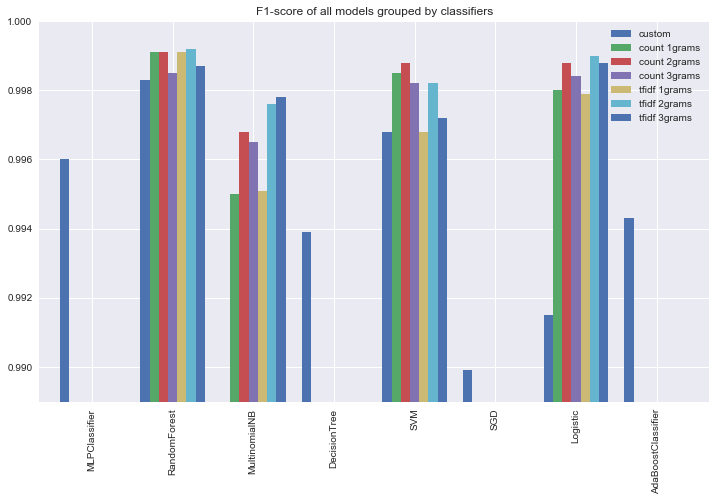

In [151]:
def get_classifier_name(index):
    '''
    Returns the name of the classifier at the given index name
    '''
    return index.split()[len(index.split())-1]
    
#Group rows together using same classifier
grouped = classifier_results.groupby(get_classifier_name)

hist_df = pd.DataFrame(columns=['custom','count 1grams','count 2grams','count 3grams','tfidf 1grams','tfidf 2grams','tfidf 3grams'])

for classifier, indices in grouped.groups.items():
    
    #Make a list of feature spaces
    feature_spaces = indices.tolist()
    feature_spaces = [feature_space.replace(classifier,'') for feature_space in feature_spaces]
    feature_spaces = [feature_space.strip() for feature_space in feature_spaces]

    #If no result exists, it will stay as 0
    hist_df.loc[classifier] = {
            'custom':0,
            'count 1grams':0,
            'count 2grams':0,
            'count 3grams':0,
            'tfidf 1grams':0,
            'tfidf 2grams':0,
            'tfidf 3grams':0
    }
    
    #Extract F1-score from classifier_results to corrensponding entry in hist_df
    for fs in feature_spaces:
        hist_df[fs].loc[classifier] = classifier_results['F1-score'].loc[fs + ' ' + classifier]
        

#Plot the bar plot
f, ax = plt.subplots()
ax.set_ylim([0.989,1])
hist_df.plot(kind='bar', figsize=(12,7), title='F1-score of all models grouped by classifiers', ax=ax, width=0.8)


#Make Avgerage F1-score row and cols for the table and print the table
hist_df_nonzero = hist_df.copy()
hist_df_nonzero[hist_df > 0] = True
hist_df['Avg Feature'] = (hist_df.sum(axis=1) / np.array(hist_df_nonzero.sum(axis=1)))
hist_df_nonzero = hist_df.copy()
hist_df_nonzero[hist_df > 0] = True
hist_df.loc['Avg Classifier'] = (hist_df.sum(axis=0) / np.array(hist_df_nonzero.sum(axis=0)))
hist_df = hist_df.round(4)
display(hist_df)


### Learning curves
Create learning curves for a sample of classifiers. This is to visualize how the dataset size impacts the performance

In [44]:
def plot_learning_curve(df_row,X,Y):
    '''Plots the learning curve of a classifier with its parameters
    
    input - df_row: row of classifier_result
            X: payload data
            Y: labels
    '''
    #The classifier to plot learning curve for
    estimator = df_row['model']
    
    title = 'Learning curves for classifier ' + df_row.name
    train_sizes = np.linspace(0.1,1.0,5)
    cv = ShuffleSplit(n=len(X), n_iter=3, test_size=0.2, random_state=0)
    
    #plot settings
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    print('learning curve in process...')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, n_jobs=-1, train_sizes=train_sizes, verbose=0) #Change verbose=10 to print progress
    print('Learning curve done!')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Three examples of learning curves from the trained classifiers.  
All learning curves have upsloping cross-validation score at the end,  
which means that adding more data would potentially increase the accuracy

learning curve in process...
Learning curve done!


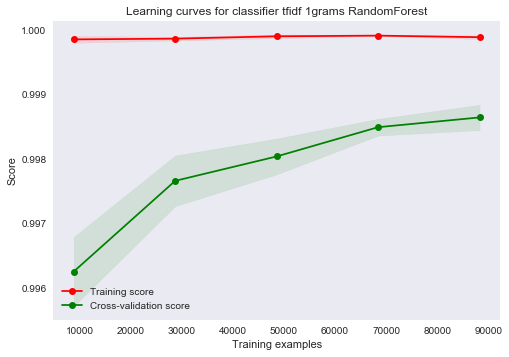

learning curve in process...
Learning curve done!


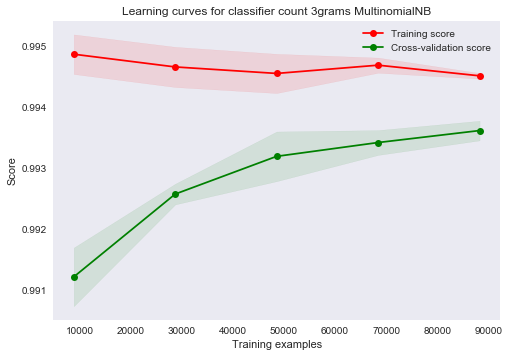

learning curve in process...
Learning curve done!


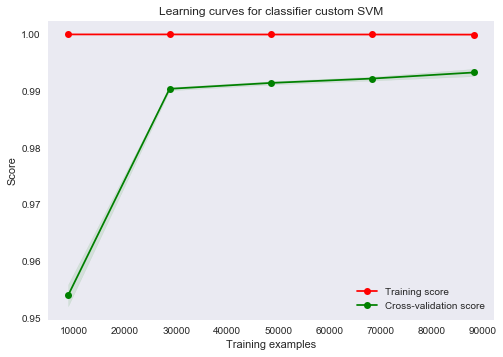

In [45]:
#plot learning curve for tfidf 1grams RandomForest
X = payloads['payload']
Y = payloads['is_malicious']
plot_learning_curve(classifier_results.iloc[0],X,Y)

#plot learning curve for count 3grams MultinomialNB
X = payloads['payload']
Y = payloads['is_malicious']
plot_learning_curve(classifier_results.iloc[6],X,Y)

#plot learning curve for custom svm
X = create_features(pd.DataFrame(payloads['payload'].copy()))
Y = payloads['is_malicious']
plot_learning_curve(classifier_results.iloc[5],X,Y)


### ROC curves
Plot ROC curves for a range of classifiers to visualize the sensitivity/specificity trade-off and the AUC

In [240]:
def visualize_result(classifier_list):
    '''Plot the ROC curve for a list of classifiers in the same graph
    
    input - classifier_list: a subset of classifier_results
    '''

    f, (ax1, ax2) = plt.subplots(1,2)
    f.set_figheight(6)
    f.set_figwidth(15)
    
    #Subplot 1, ROC curve
    for classifier in classifier_list:
        ax1.plot(classifier['roc']['fpr'], classifier['roc']['tpr'])
        ax1.scatter(1-classifier['specificity'],classifier['sensitivity'], edgecolor='k')
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1.0])
    ax1.set_title('ROC curve for top3 and bottom3 classifiers')
    ax1.set_xlabel('False Positive Rate (1 - Specificity)')
    ax1.set_ylabel('True Positive Rate (Sensitivity)')
    ax1.grid(True)
    
    #subplot 2, ROC curve zoomed
    for classifier in classifier_list:
        ax2.plot(classifier['roc']['fpr'], classifier['roc']['tpr'])
        ax2.scatter(1-classifier['specificity'],classifier['sensitivity'], edgecolor='k')
    ax2.set_xlim([0, 0.3])
    ax2.set_ylim([0.85, 1.0])
    ax2.set_title('ROC curve for top3 and bottom3 classifiers (Zoomed)')
    ax2.set_xlabel('False Positive Rate (1 - Specificity)')
    ax2.set_ylabel('True Positive Rate (Sensitivity)')
    ax2.grid(True)
    
    #Add further zoom
    left, bottom, width, height = [0.7, 0.27, 0.15, 0.15]
    ax3 = f.add_axes([left, bottom, width, height])
    
    for classifier in classifier_list:
        ax3.plot(classifier['roc']['fpr'], classifier['roc']['tpr'])
        ax3.scatter(1-classifier['specificity'],classifier['sensitivity'], edgecolor='k')
        
    ax3.set_xlim([0, 0.002])
    ax3.set_ylim([0.983, 1.0])
    ax3.set_title('Zoomed even further')
    ax3.grid(True)
    plt.show()
    

Plot ROC curves for the top3 classifiers and the bottom 3 classifiers, sorted by F1-score  
Left: standard scale ROC curve 
Right: zoomed in version of same graph, to easier see in the upper right corner

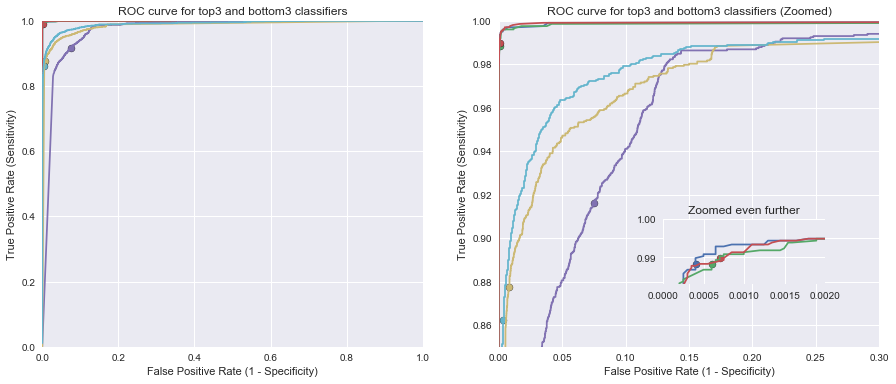

In [241]:
indices = [0,1,2, len(classifier_results)-1,len(classifier_results)-2,len(classifier_results)-3]
visualize_result([classifier_results.iloc[index] for index in indices])

## Step6 - Website integration extract
This is the code needed when implementing the saved classifier in tfidf_2grams_randomforest.p on a server

In [16]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

classifier = pickle.load( open("data/tfidf_2grams_randomforest.p", "rb"))

def injection_test(inputs):
    variables = inputs.split('&')
    values = [ variable.split('=')[1] for variable in variables]
    print(values)
    return 'MALICIOUS' if classifier.predict(values).sum() > 0 else 'NOT_MALICIOUS'


In [24]:
#test injection_test
display(injection_test("val1=%3Cscript%3Ekiddie"))

['%3Cscript%3Ekiddie']


'MALICIOUS'

# (Step7)
we can display which types of queries the classifiers failed to classify. These are interesting to examine for further work on how to improve the classifiers and the quality of the data set

In [38]:
pipe = Pipeline([('vect', vectorizer), ('clf',LogisticRegression(C=10))])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

cv = ShuffleSplit(n=len(X_train), n_iter=1, test_size=0.2, random_state=0) #DEBUG: n_iter=10

random_grid_search = RandomizedSearchCV(
    pipe, 
    param_distributions={
        'clf__C':[10]
    },
    cv=cv, 
    scoring='roc_auc', 
    n_iter=1, 
    random_state=5,
    refit=True
)
random_grid_search.fit(X_train, Y_train)

#Evaluate the best model on the test data
Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)


index
28660    dojo.io.script.jsonp_dojoIoScript60693._jsonpC...
17914                                      127.0.0.1 | id|
Name: payload, dtype: object

In [45]:
#Payloads classified incorrectly
pd.options.display.max_colwidth = 200
print('False positives')
print(X_test[(Y_test == 0) & (Y_test_predicted == 1)])
print('False negatives')
print(X_test[(Y_test == 1) & (Y_test_predicted == 0)])

False positives
index
28660    dojo.io.script.jsonp_dojoIoScript60693._jsonpCallback
17914                                          127.0.0.1 | id|
Name: payload, dtype: object
False negatives
index
8224                                                                                                                                                    '<'s'v'g' o'n'l'o'a'd'='a'l'e'r't'('7')' '>'
250                                                                                                                                                                b'<? popen($_REQUEST["c4"]); ?> '
9145                                                                                                                                                                       > XSS | Replacive Fuzzers
10000                                                                                                                                                                                           ;id;
9817         